In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd


In [61]:
# STEP 1
myDF = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/test.csv')


In [62]:
# STEP 2
print(myDF.head(3))


   ID  Range  Value Type Zip Code Model   Cost      Continent
0  10    192     50    F   NXEYEM  EX85  [56$]           Asia
1  20    299     21    M   VNFKZD  CT41  [18$]           Asia
2  30    378     28    X   IMGMFY  VN81  [90$]  North America


In [63]:
# STEP 3
myDF_temp = myDF.drop('Model', axis=1)


In [64]:
# STEP 4
myDF = myDF.drop('Model', axis=1)
# Checking if the 'Model' column is deleted
# There will be no output if it is deleted
print(myDF.head())


   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
1  20    299     21    M   VNFKZD  [18$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
3  40    156     44    Q   RHRHJY  [89$]           Asia
4  50    468     33    J   HPQCMC  [95$]         Africa


In [65]:
# STEP 5
myDF.drop([1, 3, 5], inplace=True)
#  Show the first 4 rows of myDF
print(myDF.head(4))


   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
4  50    468     33    J   HPQCMC  [95$]         Africa
6  70    327     24    F   NLVQPY  [25$]         Europe


In [66]:
# STEP 6
range_mean = myDF['Range'].mean()

In [67]:
# STREP 7
f_count = (myDF['Type'] == 'F').sum()

# Replace 'F' with 'AAA' in the 'Type' column permanently
myDF['Type'].replace('F', 'AAA', inplace=True)

#  Display the first 5 rows
print(myDF.head(5))



   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50  AAA   NXEYEM  [56$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
4  50    468     33    J   HPQCMC  [95$]         Africa
6  70    327     24  AAA   NLVQPY  [25$]         Europe
7  80    495     50    Z   DLUMAX  [70$]     Antarctica


In [68]:
# STEP 8
myDF['Cost'] = myDF['Cost'].replace('[\$,]', '', regex=True)
# Convert values inside square brackets to NaN and then fillna with 0
myDF['Cost'] = pd.to_numeric(myDF['Cost'], errors='coerce').fillna(0)

#  Display the first 5 rows and check the type of 'Cost' column
print(myDF.head(5))
print(myDF['Cost'].dtype)

   ID  Range  Value Type Zip Code  Cost      Continent
0  10    192     50  AAA   NXEYEM   0.0           Asia
2  30    378     28    X   IMGMFY   0.0  North America
4  50    468     33    J   HPQCMC   0.0         Africa
6  70    327     24  AAA   NLVQPY   0.0         Europe
7  80    495     50    Z   DLUMAX   0.0     Antarctica
float64


In [69]:
# STEP 9
myDF['Cost'] = myDF['Cost'].astype(int)

#  Display the result
print(myDF.head())


   ID  Range  Value Type Zip Code  Cost      Continent
0  10    192     50  AAA   NXEYEM     0           Asia
2  30    378     28    X   IMGMFY     0  North America
4  50    468     33    J   HPQCMC     0         Africa
6  70    327     24  AAA   NLVQPY     0         Europe
7  80    495     50    Z   DLUMAX     0     Antarctica


In [70]:
# STEP 10
cost_mean = myDF['Cost'].mean()

#  Calculate the average of 'Cost' for each 'Continent'
continent_cost_mean = myDF.groupby('Continent')['Cost'].mean()

In [71]:
# STEP 11
continent_cost_stats = myDF.groupby('Continent')['Cost'].agg(['min', 'max', 'std'])


In [72]:
# STP 12
continent_stats = myDF.groupby('Continent').describe()

<ipython-input-73-b566394fd114>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_mean_chart = myDF.groupby('Continent').mean().plot(kind='bar')


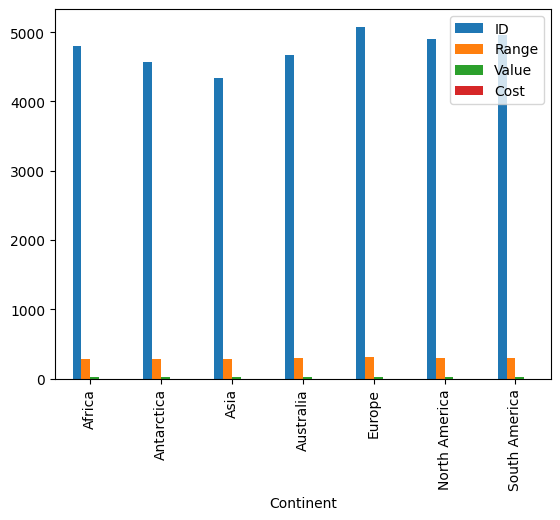

In [73]:
# STEP 13
continent_mean_chart = myDF.groupby('Continent').mean().plot(kind='bar')


In [74]:
# STEP 14
continent_counts = myDF['Continent'].value_counts()

In [75]:
#STEP 15
continent_percentage = myDF['Continent'].value_counts(normalize=True) * 100



In [76]:
#STEP 16
unique_continents = myDF['Continent'].unique()

#  Show the number of unique values in the 'Continent' column
num_unique_continents = len(unique_continents)


In [77]:
#STEP 17
cost_value_counts = myDF['Cost'].value_counts()


<Axes: ylabel='Frequency'>

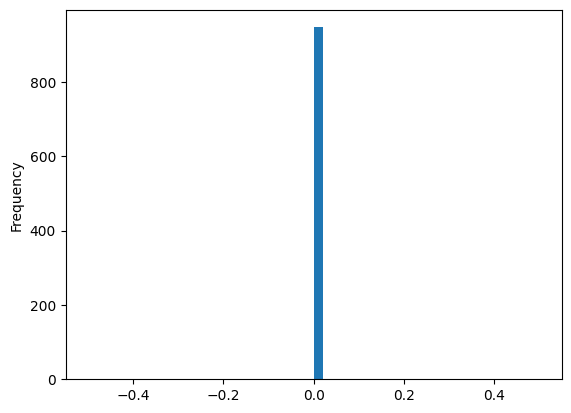

In [78]:
#STEP 18
myDF['Cost'].plot(kind='hist', bins=50)


<Axes: ylabel='Frequency'>

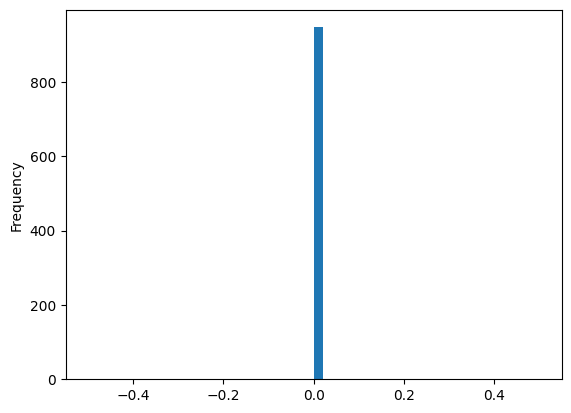

In [79]:
#STEP 19
# Bonus
myDF['Cost'].plot(kind='hist', bins=50)


In [80]:
#STEP 20
missing_zip_code = myDF['Zip Code'].isnull().sum()

# How many missing values in the 'Type' column?
missing_type = myDF['Type'].isnull().sum()

#  Provide a brief summary of null values for the entire DataFrame
null_summary = myDF.isnull().sum()

In [81]:
#STEP 21
rows_after_dropna = myDF.dropna().shape[0]


In [82]:
#STEP 22
type_value_counts = myDF['Type'].value_counts(dropna=False)

In [83]:
#STEP 23
myDF['Type'].fillna('XXX', inplace=True)


In [84]:
#STEP 24
myDF.dropna(inplace=True)

#Show the number of rows after dropping missing values
rows_after_dropna_permanent = myDF.shape[0]

In [85]:
#STEP 25
myDF.set_index('ID', inplace=True)
myDF.index.name = None

# Show the first 5 rows of the DataFrame
print(myDF.head())

# Show the value of the cell with ID 70 and column header 'Value'
value_at_70 = myDF.at[70, 'Value']


    Range  Value Type Zip Code  Cost      Continent
10    192     50  AAA   NXEYEM     0           Asia
30    378     28    X   IMGMFY     0  North America
50    468     33    J   HPQCMC     0         Africa
70    327     24  AAA   NLVQPY     0         Europe
80    495     50    Z   DLUMAX     0     Antarctica


In [86]:
#STEP 26
print(myDF.index)
print(myDF.columns)
print(myDF.shape)

# Bring back the 'ID' column to the DataFrame and reset the index
myDF.reset_index(inplace=True)

# Show the index, columns, and shape of the current DataFrame
print(myDF.index)
print(myDF.columns)
print(myDF.shape)

Int64Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
            ...
            9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
           dtype='int64', length=938)
Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
(938, 6)
RangeIndex(start=0, stop=938, step=1)
Index(['index', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
(938, 7)


In [87]:
#STEP 27
describe_stats = myDF.describe()


In [88]:
#STEP 28
continent_counts_sorted = myDF['Continent'].value_counts().sort_values()

# Sort the value_counts() of the 'Continent' column alphabetically
continent_counts_alphabetical = myDF['Continent'].value_counts().sort_index()



In [89]:
#STEP 29
rows_1_3_5_7_columns = myDF.loc[[1, 3, 5, 7]]
type_continent_columns = myDF.loc[:, ['Type', 'Continent']].head(7)

In [90]:
#STEP 30
value_of_XXX_type = myDF.loc[myDF['Type'] == 'XXX', 'Value']